<a href="https://colab.research.google.com/github/zedeme/E-Commerce/blob/main/g-E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentacion de Clientes E-Commerce**

---

In [155]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
from plotly import express as px

In [10]:
df = pd.read_csv("/content/sample_data/ventas-por-factura.csv")

In [11]:
df

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,-1.45
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83
...,...,...,...,...,...,...
25948,C556518,6/13/2021 10:53:00,16794.0,United Kingdom,-2,-12.70
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,720.00
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,298.78
25951,550122,4/14/2021 12:39:00,12931.0,United Kingdom,"1,176","1,488.00"


### **Entendiendo el dataframe**
Vamos a limpiar, analizar y manipular el dataframe para contestar preguntas que nos puedan llevar a hipotesis para nuestro posterior modelo.

In [12]:
df.dtypes

N° de factura        object
Fecha de factura     object
ID Cliente          float64
País                 object
Cantidad             object
Monto                object
dtype: object

In [13]:
df.describe()

,ID Cliente
count,22229.000000
mean,15238.289892
std,1732.981685
min,12346.000000
25%,13755.000000
50%,15136.000000
75%,16746.000000
max,18287.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  object 
 5   Monto             25953 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.2+ MB


In [15]:
df.isnull().sum()

N° de factura          0
Fecha de factura       0
ID Cliente          3724
País                   0
Cantidad               0
Monto                  0
dtype: int64

In [161]:
df_i_c = pd.read_csv("/content/sample_data/countries_codes_and_coordinates.csv")

In [162]:
df_i_c

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""
...,...,...,...,...,...,...
251,Wallis and Futuna,"""WF""","""WLF""","""876""","""-13.3""","""-176.2"""
252,Western Sahara,"""EH""","""ESH""","""732""","""24.5""","""-13"""
253,Yemen,"""YE""","""YEM""","""887""","""15""","""48"""
254,Zambia,"""ZM""","""ZMB""","""894""","""-15""","""30"""


###### ***Pregunta 1: ¿Cuanto es lo que venden en promedio al mes?***

In [16]:
df = df.dropna(axis="rows")

In [17]:
df["Fecha de factura"] = df["Fecha de factura"].apply(lambda x: pd.to_datetime(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
def n_p(x):
  if "," in x:
    return float(x.replace(",", ""))
  return float(x)

In [19]:
df["Cantidad"] = df["Cantidad"].apply(lambda x: n_p(x) if n_p(x) > 0 else None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df = df.dropna(axis="rows")

In [21]:
df["Cantidad"]

0         123.0
1         163.0
3           1.0
4         357.0
5          91.0
          ...  
25945     432.0
25946      28.0
25949     488.0
25950     104.0
25951    1176.0
Name: Cantidad, Length: 18570, dtype: float64

In [22]:
df["Monto"] = df["Monto"].apply(lambda x: n_p(x) if n_p(x) > 0 else None)

In [23]:
df = df.dropna(axis="rows")

In [24]:
df["month"] = df["Fecha de factura"].apply(lambda x: (x.month) if x.year != 2020 else 0)
df["year"] = df["Fecha de factura"].apply(lambda x: x.year)

In [25]:
df_t = pd.pivot_table(df, index=["month", "year"], aggfunc="mean")
df_t = df_t.reset_index()

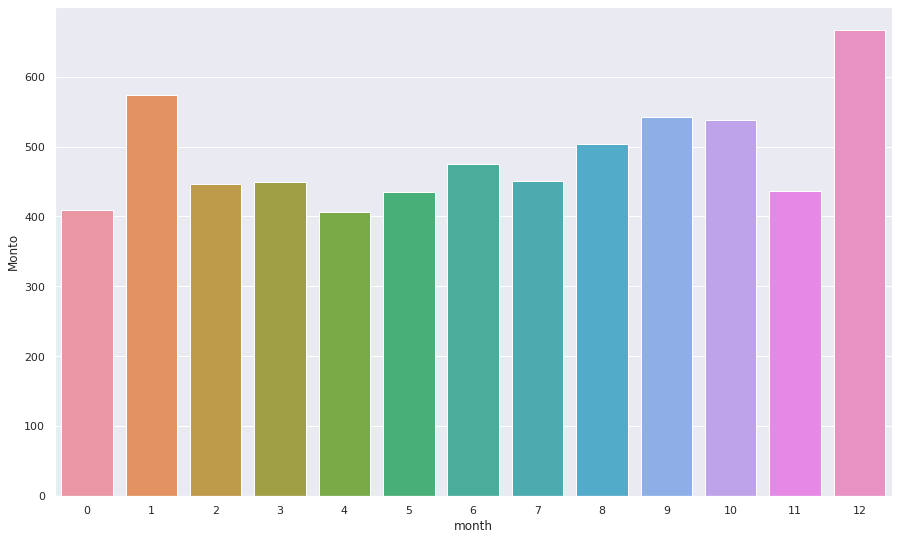

In [26]:
sns.set(rc={"figure.figsize": (15, 9)})
sns.barplot(data=df_t,x="month", y="Monto")

In [27]:
df_t["Monto"].mean()

487.1737498660076

In [28]:
df_n = df[df["País"] != "United Kingdom"]

***Respuesta: El mes que mas gana es el diciembre de 2021, el promedio de ventas en el mes es de 487.1737498660076***

---

###### ***Pregunta 2: ¿Cuantas ventas tienen cada mes?***

In [29]:
df.dtypes

N° de factura               object
Fecha de factura    datetime64[ns]
ID Cliente                 float64
País                        object
Cantidad                   float64
Monto                      float64
month                        int64
year                         int64
dtype: object

In [30]:
df["ID Cliente"] = df["ID Cliente"].astype(str)

In [31]:
df

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,month,year
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123.0,229.33,3,2021
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163.0,209.73,11,2021
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1.0,39.95,4,2021
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357.0,344.83,10,2021
5,576630,2021-11-16 08:38:00,13816.0,Germany,91.0,199.98,11,2021
...,...,...,...,...,...,...,...,...
25945,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432.0,1034.40,11,2021
25946,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28.0,82.76,11,2021
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488.0,720.00,5,2021
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104.0,298.78,11,2021


In [32]:
df_t = pd.pivot_table(df, index=["month"], aggfunc="count")

In [33]:
df_t = df_t.reset_index()

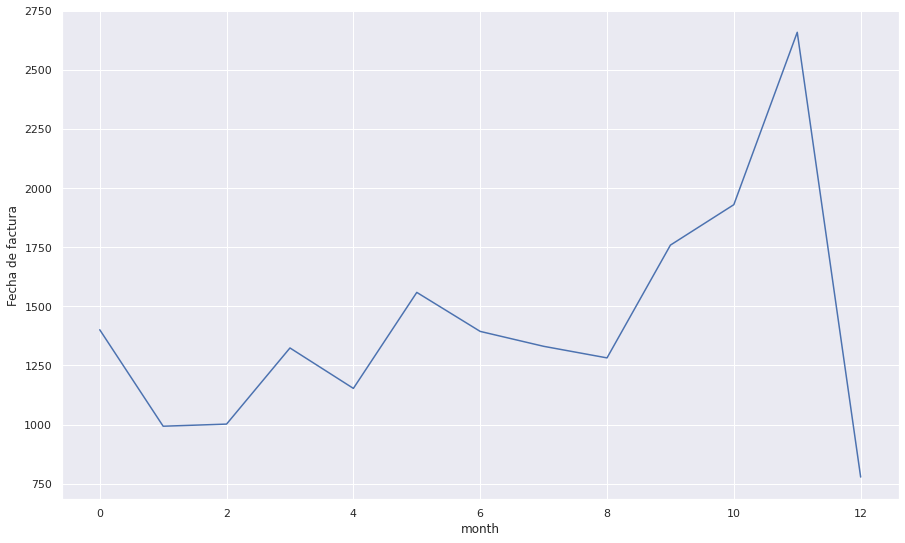

In [34]:
sns.lineplot(x=df_t["month"], y=df_t["Fecha de factura"])

In [35]:
df_t["ID Cliente"].mean()

1428.076923076923

***Respuesta: las ventas promedio por mes son de 1428.076923076923, presentan una subida con respecto a los primeros meses del año.***

---

###### ***Pregunta 3: ¿Cuales son sus clientes mas importantes?***

In [36]:
df_c = pd.pivot_table(df, index=["ID Cliente"], aggfunc="sum")

In [37]:
df_c = df_c.reset_index()

In [38]:
df_c  = df_c.sort_values(by="Monto", ascending=False)

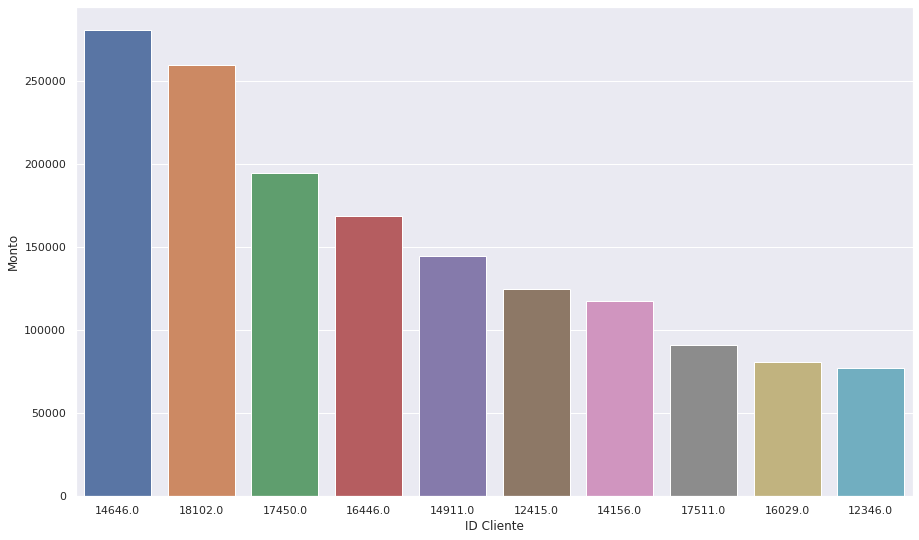

In [39]:
sns.barplot(x=df_c["ID Cliente"].head(10), y=df_c["Monto"].head(10))

In [40]:
df_c = pd.pivot_table(df, index=["ID Cliente"], aggfunc="sum")
df_c = df_c.reset_index()

In [41]:
df_c = df_c.sort_values(by="Cantidad", ascending=False)

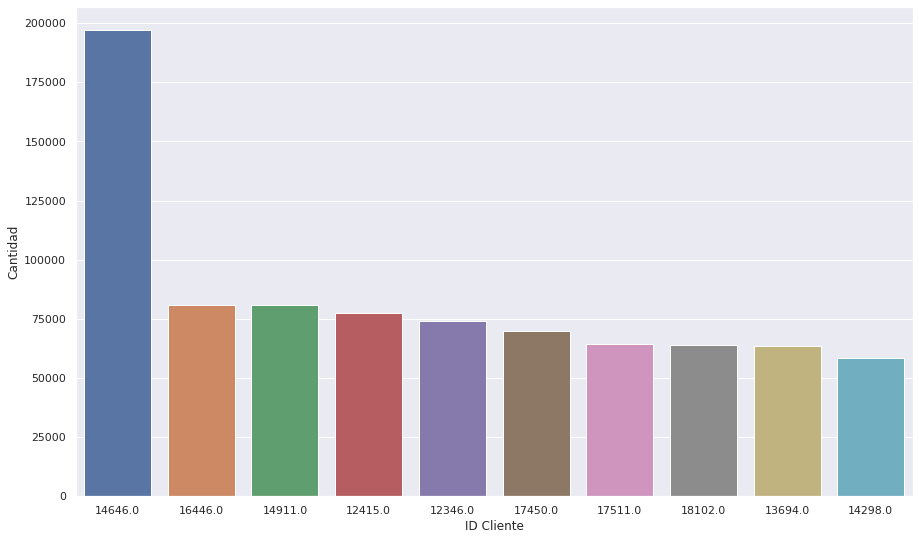

In [43]:
sns.barplot(x=df_c["ID Cliente"].head(10), y=df_c["Cantidad"].head(10))

In [44]:
df_c

,ID Cliente,Cantidad,Monto,month,year
1689,14646.0,196915.0,280206.02,523,147531
3008,16446.0,80997.0,168472.50,17,4042
1879,14911.0,80717.0,144601.36,1464,410250
55,12415.0,77670.0,124914.53,144,42441
0,12346.0,74215.0,77183.60,1,2021
...,...,...,...,...,...
4098,17956.0,1.0,12.75,4,2021
2558,15823.0,1.0,15.00,0,2020
3219,16742.0,1.0,464.90,10,2021
4013,17846.0,1.0,2033.10,9,2021


***Respuesta: El cliente mas importante segun el monto gastado y la cantidad de compras es el de la ID 14646.***

---

###### ***Pregunta 4: ¿Cual es el monto promedio que gastan sus clientes?***

In [45]:
df_c = pd.pivot_table(df, index=["ID Cliente"], aggfunc="mean")
df_c = df_c.reset_index()

In [46]:
df_c

,ID Cliente,Cantidad,Monto,month,year
0,12346.0,74215.000000,77183.600000,1.000000,2021.000000
1,12347.0,351.142857,615.714286,5.857143,2020.857143
2,12348.0,585.250000,449.310000,3.500000,2020.750000
3,12349.0,631.000000,1757.550000,11.000000,2021.000000
4,12350.0,197.000000,334.400000,2.000000,2021.000000
...,...,...,...,...,...
4333,18280.0,45.000000,180.600000,3.000000,2021.000000
4334,18281.0,54.000000,80.820000,6.000000,2021.000000
4335,18282.0,51.500000,89.025000,10.000000,2021.000000
4336,18283.0,87.312500,130.930000,7.125000,2021.000000


In [47]:
df_c["Monto"].mean()

418.7159133391849

***Respuesta: El monto promedio que gastan los clientes es de 418.7159133391849***

---

######***Pregunta 5: ¿Que porcentaje de sus clientes han vuelto a comprarles?***

In [133]:
df_n = df.sort_values(by="Fecha de factura")

In [134]:
df_n = df_n[["Fecha de factura", "ID Cliente"]].drop_duplicates(subset=["ID Cliente"])

In [135]:
df

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,month,year
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123.0,229.33,3,2021
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163.0,209.73,11,2021
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1.0,39.95,4,2021
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357.0,344.83,10,2021
5,576630,2021-11-16 08:38:00,13816.0,Germany,91.0,199.98,11,2021
...,...,...,...,...,...,...,...,...
25945,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432.0,1034.40,11,2021
25946,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28.0,82.76,11,2021
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488.0,720.00,5,2021
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104.0,298.78,11,2021


In [136]:
df_n["month_cohort"] = df["Fecha de factura"].apply(lambda x: x.month if x.year != 2020 else 0)

In [137]:
df_n

,Fecha de factura,ID Cliente,month_cohort
9367,2020-12-01 08:26:00,17850.0,0
6876,2020-12-01 08:34:00,13047.0,0
505,2020-12-01 08:45:00,12583.0,0
12932,2020-12-01 09:00:00,13748.0,0
24617,2020-12-01 09:09:00,15100.0,0
...,...,...,...
11210,2021-12-08 10:33:00,13436.0,12
13190,2021-12-08 10:58:00,15520.0,12
18394,2021-12-08 13:11:00,13298.0,12
12056,2021-12-08 14:58:00,14569.0,12


In [138]:
df_t = df.sort_values(by="Fecha de factura")

In [139]:
df_n = df_n.pivot_table(df_n, index=["ID Cliente"])

In [140]:
df_c = pd.merge(right=df, left=df_n, on="ID Cliente")

In [141]:
df_c[df_c["ID Cliente"] == "14646.0"]

,ID Cliente,month_cohort,N° de factura,Fecha de factura,País,Cantidad,Monto,month,year
7399,14646.0,0,562789,2021-08-09 13:50:00,Netherlands,7807.0,12341.21,8,2021
7400,14646.0,0,547796,2021-03-25 12:34:00,Netherlands,731.0,1407.86,3,2021
7401,14646.0,0,578140,2021-11-23 10:58:00,Netherlands,5760.0,7952.68,11,2021
7402,14646.0,0,569719,2021-10-06 09:10:00,Netherlands,340.0,788.16,10,2021
7403,14646.0,0,574058,2021-11-02 14:10:00,Netherlands,216.0,449.28,11,2021
...,...,...,...,...,...,...,...,...,...
7467,14646.0,0,572051,2021-10-20 12:24:00,Netherlands,3020.0,4311.48,10,2021
7468,14646.0,0,575510,2021-11-10 10:33:00,Netherlands,1040.0,1549.12,11,2021
7469,14646.0,0,578141,2021-11-23 11:04:00,Netherlands,200.0,290.00,11,2021
7470,14646.0,0,558311,2021-06-28 11:22:00,Netherlands,1588.0,2739.92,6,2021


In [142]:
df_c = pd.pivot_table(df_c, index=["month_cohort"],columns=["month"],aggfunc="count")

In [143]:
df_c["Cantidad"]

month,0,1,2,3,4,5,6,7,8,9,10,11,12
month_cohort,,,,,,,,,,,,,
0,1401.0,520.0,460.0,583.0,507.0,653.0,572.0,547.0,539.0,643.0,628.0,945.0,335.0
1,NaN,473.0,117.0,149.0,125.0,187.0,161.0,145.0,135.0,163.0,192.0,246.0,65.0
2,NaN,NaN,425.0,91.0,94.0,147.0,124.0,118.0,110.0,140.0,120.0,166.0,30.0
3,NaN,NaN,NaN,501.0,88.0,153.0,124.0,123.0,99.0,145.0,140.0,195.0,47.0
4,NaN,NaN,NaN,NaN,339.0,91.0,72.0,72.0,69.0,77.0,75.0,104.0,27.0
5,NaN,NaN,NaN,NaN,NaN,328.0,71.0,60.0,64.0,82.0,80.0,105.0,30.0
6,NaN,NaN,NaN,NaN,NaN,NaN,270.0,53.0,45.0,79.0,70.0,117.0,27.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0,38.0,51.0,48.0,70.0,22.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0,42.0,59.0,53.0,22.0


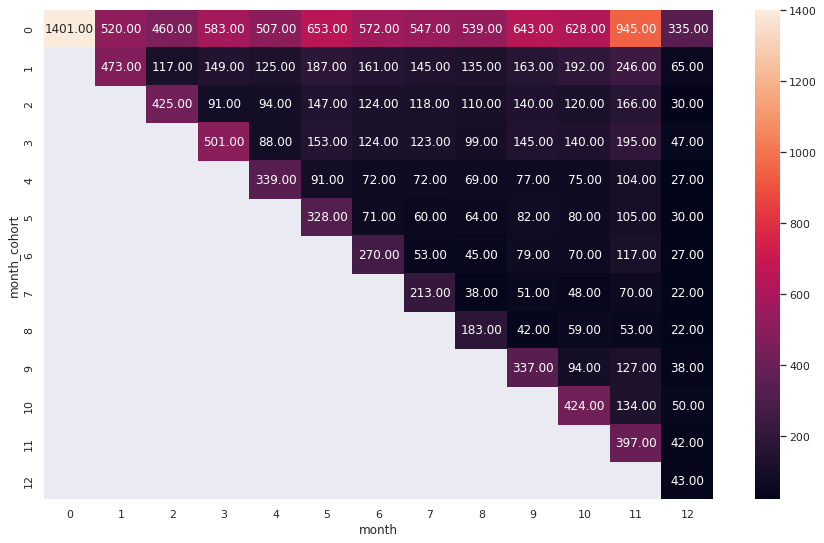

In [154]:
sns.heatmap(df_c["Fecha de factura"], annot=True, fmt=".2f")

***Respuesta: Es una tasa muy baja de retencion sobre todo en los ultimos meses.***

---

###### ***Pregunta 6: ¿Cuanto de las ventas corresponde a cada pais? ¿De donde son los compradores?***

In [208]:
df["pais_codigo"] = df["País"].apply(lambda x: str(df_i_c[df_i_c["Country"] == x]["Alpha-3 code"]).replace('"', "").split(" ")[5].split("\n")[0])

In [209]:
df_c = df.pivot_table(df, index=["pais_codigo", "País"], aggfunc="count")
df_c = df_c.reset_index()

In [210]:
df_c["Cantidad"]

0         3
1        57
2        17
3        98
4         2
5         1
6         6
7        51
8        16
9         2
10      457
11       18
12       90
13       41
14      390
15    16675
16        5
17        7
18        5
19       38
20       20
21        1
22        4
23        5
24       94
25       36
26       19
27       57
28        1
29        7
30       36
31       26
32      262
33        4
34        1
35        5
36        8
Name: Cantidad, dtype: int64

In [211]:
df

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,month,year,pais_codigo
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123.0,229.33,3,2021,GBR
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163.0,209.73,11,2021,GBR
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1.0,39.95,4,2021,GBR
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357.0,344.83,10,2021,GBR
5,576630,2021-11-16 08:38:00,13816.0,Germany,91.0,199.98,11,2021,DEU
...,...,...,...,...,...,...,...,...,...
25945,579252,2021-11-28 16:47:00,17450.0,United Kingdom,432.0,1034.40,11,2021,GBR
25946,574908,2021-11-07 15:37:00,16009.0,United Kingdom,28.0,82.76,11,2021,GBR
25949,553060,2021-05-13 10:44:00,15826.0,United Kingdom,488.0,720.00,5,2021,GBR
25950,577049,2021-11-17 13:58:00,17397.0,United Kingdom,104.0,298.78,11,2021,GBR


In [213]:
# El grafico no puede verse por github ya que no soporta la libreria plotly, si queres ver e interactuar con el grafico entra al proyecto en colab.
# https://colab.research.google.com/drive/1FLDDs4Xr_NU6aDfS_FEWYLzclKWCmzBh?usp=sharing

fig = px.choropleth(df_c, locations="pais_codigo",
                    color="Fecha de factura",
                    hover_name="País",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

***Respuesta: Los compradores son principalmente del Reino Unido UK, pero hay compradores en todos los continentes.***

---